Regression of housing prices in Boston

In [1]:
import pandas as pd
df = pd.read_csv('data/boston.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       491 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [3]:
# having many rows, drop the rows containing missing values
df.dropna(inplace=True)
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

#1 sklearn for linear regression

In [4]:
# split data
# here MEDV refers to the median value of housing price in $1,000, which will be treated as a target value
train = df.iloc[:,0:13]
target = df[['MEDV']]

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(train, target, test_size=0.3, random_state=42)

print(train.shape)
print(train_input.shape, test_input.shape)

(491, 13)
(343, 13) (148, 13)


In [5]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_input, train_target)
print(lr.score(train_input, train_target), lr.score(test_input, test_target))

0.7381618458803759 0.7318079210246159


In [6]:
test_predict = lr.predict(test_input)

# evaluate the model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_target, test_predict)
mse

np.float64(20.81188458031761)

In [7]:
from sklearn.metrics import r2_score
r2 = r2_score(test_target, test_predict)
r2

0.7318079210246159

In [8]:
# try RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
rr = RandomForestRegressor()
rr.fit(train_input, train_target)
print(rr.score(train_input, train_target), rr.score(test_input, test_target))

0.9770589188905444 0.828994697048246


C:\Users\shiny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [9]:
test_predict = rr.predict(test_input)

mse = mean_squared_error(test_target, test_predict)
r2 = r2_score(test_target, test_predict)

print(mse, r2)

13.27012580405406 0.828994697048246


#2 Pytorch MPL for regression

In [12]:
import torch
import torch.nn as nn
from torch.optim.adam import Adam

model = nn.Sequential(
    nn.Linear(13,50),
    nn.ReLU(),
    nn.Linear(50,1)
)

batch_size = 20
learning_rate = 0.001

adam = Adam(model.parameters(), lr=learning_rate)

loss_arr = []

for epoch in range(1000):
    # repeat batches
    for batch in range(len(train)//batch_size):
        start = batch+batch_size
        end = start + batch_size

        train_val = train.values
        target_val = target.values

        # transfrom to torch.FloatTensor
        train_tensor = torch.FloatTensor(train_val[start:end])
        target_tensor = torch.FloatTensor(target_val[start:end])

        adam.zero_grad() # initialize the gradient of an weight
        target_predicted = model(train_tensor)
        loss = nn.MSELoss()(target_tensor, target_predicted)
        loss.backward()
        adam.step()

    if epoch % 50 == 0:
        loss_arr.append(loss.item())
        print(f'At epoch #{epoch}, loss : {loss.item()}')

At epoch #0, loss : 20.95561408996582
At epoch #50, loss : 14.461003303527832
At epoch #100, loss : 8.18962287902832
At epoch #150, loss : 4.384199142456055
At epoch #200, loss : 2.815467357635498
At epoch #250, loss : 1.627153754234314
At epoch #300, loss : 1.252791404724121
At epoch #350, loss : 1.042609453201294
At epoch #400, loss : 0.9974907040596008
At epoch #450, loss : 0.916989803314209
At epoch #500, loss : 0.8102682828903198
At epoch #550, loss : 0.7365785837173462
At epoch #600, loss : 0.6562032103538513
At epoch #650, loss : 0.5902841687202454
At epoch #700, loss : 0.5499444603919983
At epoch #750, loss : 0.5181824564933777
At epoch #800, loss : 0.4718988537788391
At epoch #850, loss : 0.4410336911678314
At epoch #900, loss : 0.4234336316585541
At epoch #950, loss : 0.40544041991233826


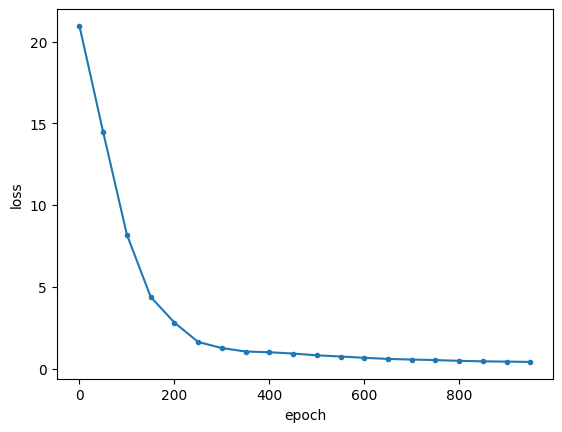

In [13]:
import matplotlib.pyplot as plt
plt.plot([50*i for i in range(len(loss_arr))],loss_arr, '.-')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

#3 Tensorflow MPL for regression

In [97]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(13,)))
model.add(keras.layers.Dense(50, activation='relu'))
model.add(keras.layers.Dense(10, activation='relu'))
adam = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adam, loss='mean_squared_error', metrics=['mean_squared_error'])
fit = model.fit(train_input, train_target, epochs=400, verbose=0, batch_size=20)

C:\Users\shiny\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [98]:
model.evaluate(test_input, test_target)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 77.5299 - mean_squared_error: 77.5299 


[70.11238098144531, 70.11238098144531]

In [99]:
model.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_13 (Flatten)                 │ (None, 13)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 50)                  │             700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 10)                  │             510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,632 (14.19 KB)

 Trainable params: 1,210 (4.73 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,422 (9.46 KB)

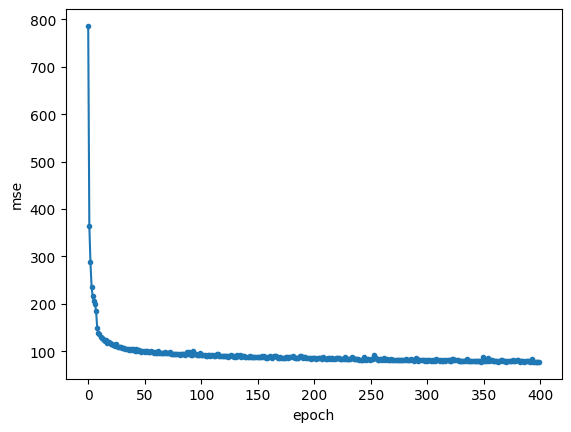

In [100]:
plt.plot(fit.history['mean_squared_error'],'.-')
plt.xlabel('epoch')
plt.ylabel('mse')
plt.show()

In [101]:
# the reason why it shows poor performance must be because the data is not properly scaled
# it also shows that keras models are more vulnerable to scaling of data than torch's

# scaling the columns before making a regression model
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
df_scaled = mm.fit_transform(df.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,0.422222
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,0.368889
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,0.660000
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,0.631111
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,0.693333


In [102]:
# split data
# here MEDV refers to the median value of housing price in $1,000, which will be treated as a target value
train_scaled = df_scaled.iloc[:,0:13]
target_scaled = df_scaled[['MEDV']]

from sklearn.model_selection import train_test_split
train_scaled_input, test_scaled_input, train_scaled_target, test_scaled_target = train_test_split(train_scaled, target_scaled, test_size=0.3, random_state=42)

print(train_scaled.shape)
print(train_scaled_input.shape, test_scaled_input.shape)

(491, 13)
(343, 13) (148, 13)


In [103]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(13,)))
model.add(keras.layers.Dense(50, activation='relu'))
model.add(keras.layers.Dense(10, activation='relu'))
adam = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adam, loss='mean_squared_error', metrics=['mean_squared_error'])
fit = model.fit(train_scaled_input, train_scaled_target, epochs=400, verbose=0, batch_size=20)

C:\Users\shiny\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


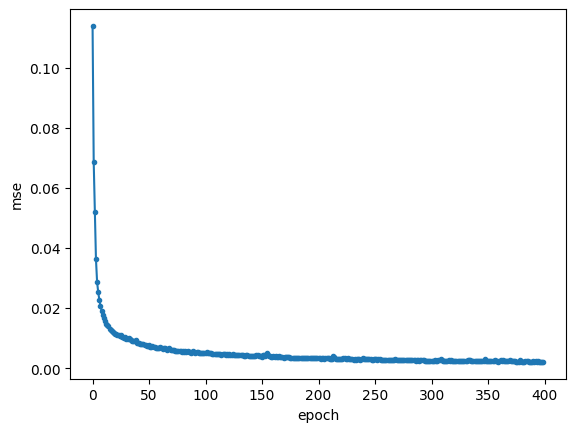

In [104]:
plt.plot(fit.history['mean_squared_error'],'.-')
plt.xlabel('epoch')
plt.ylabel('mse')
plt.show()